In [1]:
import os
os.environ["JAXTYPING_DISABLE"] = "1"

import torch
import skshapes as sks
import pyvista as pv
import numpy as np

liver1 = sks.Circle() 
liver1.points = liver1.points * torch.tensor([10.0, 8.0])
liver1.points = liver1.points + torch.tensor([0.0, 0.0]) # Centré en 0,0

liver2 = sks.Circle()
liver2.points = liver2.points * torch.tensor([8.0, 6.0])
liver2.points = liver2.points + torch.tensor([0.5, 0.0]) 

source = liver1
target = liver2

source.control_points = source.bounding_grid(N=10, offset=0.5)

model = sks.ExtrinsicDeformation(
    n_steps=10,
    kernel="gaussian",
    scale=5.0,
    control_points=True
)

loss = sks.OptimalTransportLoss()

registration = sks.Registration(
    model=model,
    loss=loss,
    optimizer=sks.LBFGS(),
    n_iter=20,
    verbose=True,
    regularization_weight=0.001 # On garde la version souple
)

morphed = registration.fit_transform(source=source, target=target)

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.
Initial loss : 1.12e+00
  = 1.12e+00 + 0.001 * 0.00e+00 (fidelity + regularization_weight * regularization)
Loss after 1 iteration(s) : 4.91e-03
  = 3.80e-04 + 0.001 * 4.53e+00 (fidelity + regularization_weight * regularization)
Loss after 2 iteration(s) : 4.73e-03
  = 2.26e-04 + 0.001 * 4.50e+00 (fidelity + regularization_weight * regularization)
Loss after 3 iteration(s) : 4.23e-03
  = 1.24e-04 + 0.001 * 4.11e+00 (fidelity + regularization_weight * regularization)
Loss after 4 iteration(s) : 4.22e-03
  = 1.05e-04 + 0.001 * 4.12e+00 (fidelity + regularization_weight * regularization)
Loss after 5 iteration(s) : 4.22e-03
  = 1.05e-04 + 0.001 * 4.12e+00 (fidelity + regularization_weight * regularization)
Loss after 6 iteration(s) : 4.22e-03
  = 1.05e-04 + 0.001 * 4.12e+00 (fidelity + regularization_weight * regularization)
Loss after 7 iteration(s) : 4.22e-03
  = 1.05e-04 + 0.001 * 4.12e+00 (fideli

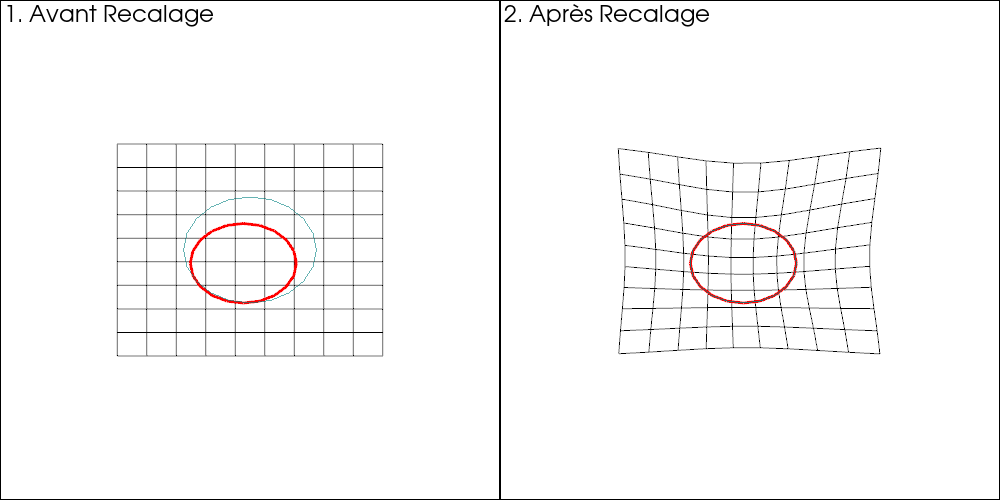

In [16]:
import numpy as np
import pyvista as pv

source_color = "teal"
target_color = "red"

plotter = pv.Plotter(shape=(1, 2))

# ==========================================
# GAUCHE : AVANT (Indice 0, 0)
# ==========================================
plotter.subplot(0, 0) # <-- On active la gauche
plotter.add_text("1. Avant Recalage", font_size=12, color="black")

if hasattr(source, "control_points") and source.control_points is not None:
    plotter.add_mesh(source.control_points.to_pyvista(), color="black", style="wireframe", line_width=1)

plotter.add_mesh(source.to_pyvista(), color=source_color, opacity=0.6)
plotter.add_mesh(target.to_pyvista(), color=target_color, style="wireframe", line_width=3)

# --- REGLAGE CAMERA GAUCHE ---
plotter.view_xy()                # Vue de dessus
plotter.enable_parallel_projection() # Pas de perspective


# ==========================================
# DROITE : APRÈS (Indice 0, 1)
# ==========================================
plotter.subplot(0, 1) # <-- On active la droite
plotter.add_text("2. Après Recalage", font_size=12, color="black")

if hasattr(morphed, "control_points") and morphed.control_points is not None:
    plotter.add_mesh(morphed.control_points.to_pyvista(), color="black", style="wireframe", line_width=1)

plotter.add_mesh(morphed.to_pyvista(), color=source_color, opacity=0.8)
plotter.add_mesh(target.to_pyvista(), color=target_color, style="wireframe", line_width=3)

# --- REGLAGE CAMERA DROITE ---
plotter.view_xy()                # Vue de dessus
plotter.enable_parallel_projection() # Pas de perspective


# ==========================================
# AFFICHAGE FINAL
# ==========================================
# On lie les vues pour que le zoom soit identique des deux côtés
plotter.link_views()

plotter.show(jupyter_backend='static', window_size=(1000, 500))